In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("../data/smh_23-24_training_set.csv")

In [ ]:
dataset["date"] = pd.to_datetime(dataset["date"])

In [ ]:
dataset

,date,microsensor_pm25,hourofday,monthofyear,season,reference_pm25,temperature,humidity
0,2023-01-01 00:00:00,23.241923,0,1,Winter,15.2,10.70,99.90
1,2023-01-01 01:00:00,23.285335,1,1,Winter,15.9,10.16,99.90
2,2023-01-01 02:00:00,21.687298,2,1,Winter,15.2,10.14,99.90
3,2023-01-01 03:00:00,19.969197,3,1,Winter,13.6,10.05,99.90
4,2023-01-01 04:00:00,16.398725,4,1,Winter,11.8,9.77,99.90
...,...,...,...,...,...,...,...,...
14148,2024-12-12 19:00:00,155.715878,19,12,Winter,24.3,2.59,97.00
14149,2024-12-12 20:00:00,119.145626,20,12,Winter,30.5,1.63,99.46
14150,2024-12-12 21:00:00,78.848558,21,12,Winter,28.1,1.22,99.90
14151,2024-12-12 22:00:00,79.502087,22,12,Winter,28.5,0.53,99.90


In [ ]:
X = dataset.drop(["reference_pm25", "microsensor_pm25", "date"], axis=1)
X = pd.get_dummies(X, columns=['season'], drop_first=False)
y = abs(dataset["reference_pm25"] - dataset["microsensor_pm25"]) >= 5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.55587
[1]	validation_0-logloss:0.51707
[2]	validation_0-logloss:0.49449
[3]	validation_0-logloss:0.47919
[4]	validation_0-logloss:0.46767
[5]	validation_0-logloss:0.45650
[6]	validation_0-logloss:0.45168
[7]	validation_0-logloss:0.44901
[8]	validation_0-logloss:0.44527
[9]	validation_0-logloss:0.44198
[10]	validation_0-logloss:0.43945
[11]	validation_0-logloss:0.43740
[12]	validation_0-logloss:0.43553
[13]	validation_0-logloss:0.43447
[14]	validation_0-logloss:0.43361
[15]	validation_0-logloss:0.43248
[16]	validation_0-logloss:0.43211
[17]	validation_0-logloss:0.43090
[18]	validation_0-logloss:0.43045
[19]	validation_0-logloss:0.42956
[20]	validation_0-logloss:0.42904
[21]	validation_0-logloss:0.42894
[22]	validation_0-logloss:0.42903
[23]	validation_0-logloss:0.42874
[24]	validation_0-logloss:0.42929
[25]	validation_0-logloss:0.42946


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
precision_score(pred, y_test)

np.float64(0.6183406113537118)

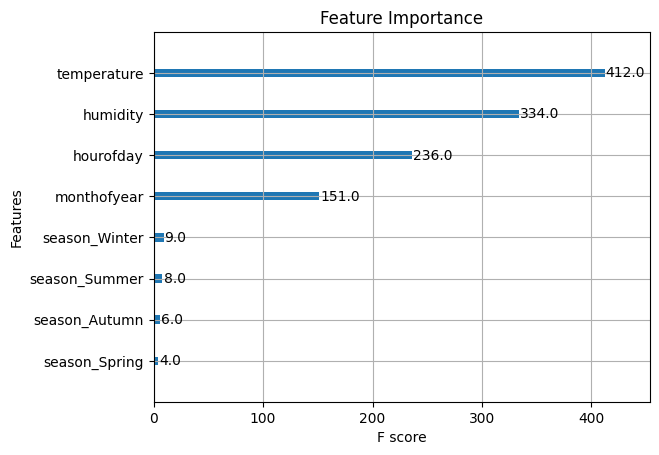

In [ ]:
xgb.plot_importance(clf, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

# Remove month of year

In [ ]:
X_train.drop(columns='monthofyear', inplace=True)
X_test.drop(columns='monthofyear', inplace=True)

In [ ]:
# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.56252
[1]	validation_0-logloss:0.52895
[2]	validation_0-logloss:0.50722
[3]	validation_0-logloss:0.49354
[4]	validation_0-logloss:0.48592
[5]	validation_0-logloss:0.48119
[6]	validation_0-logloss:0.47794
[7]	validation_0-logloss:0.47529
[8]	validation_0-logloss:0.47420
[9]	validation_0-logloss:0.47217
[10]	validation_0-logloss:0.47213
[11]	validation_0-logloss:0.47186
[12]	validation_0-logloss:0.47156
[13]	validation_0-logloss:0.47091
[14]	validation_0-logloss:0.47066
[15]	validation_0-logloss:0.47028
[16]	validation_0-logloss:0.47015
[17]	validation_0-logloss:0.46807
[18]	validation_0-logloss:0.46837
[19]	validation_0-logloss:0.46731
[20]	validation_0-logloss:0.46713
[21]	validation_0-logloss:0.46672
[22]	validation_0-logloss:0.46742
[23]	validation_0-logloss:0.46668
[24]	validation_0-logloss:0.46686


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
precision_score(pred, y_test)

np.float64(0.5580786026200873)

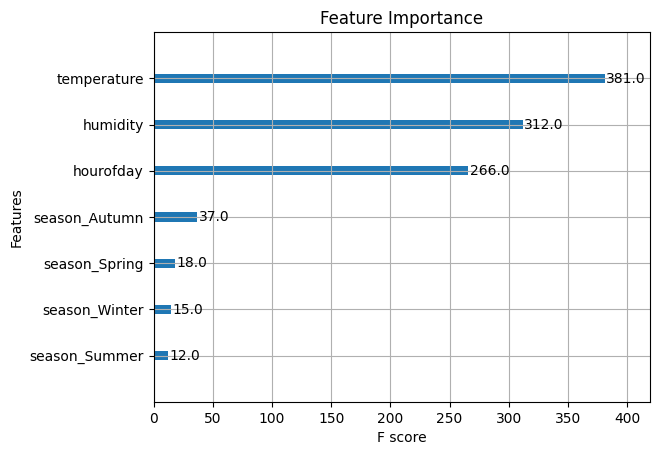

In [ ]:
xgb.plot_importance(clf, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()